<a href="https://colab.research.google.com/github/magesh73/Restnet50Dataset/blob/master/AutoPilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


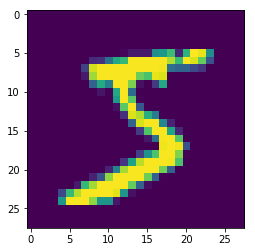

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
model = Sequential()

k=1
f=16
input=28

while (k < input):
  model = Sequential()
  model.add(Convolution2D(f, k, k, activation='relu', input_shape=(28,28,1)))
  #model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

  model.add(Convolution2D(10, 1, activation='relu'))

  model.add(Convolution2D(10, input-k+1))
  #model.add(Convolution2D(10, 26))

  model.add(Flatten())
  model.add(Activation('softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
  model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Score-->', score)
  k=k+2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        32        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 10)        170       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)          78410     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 78,612
Trainable params: 78,612
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3658 - acc: 0.8980
Epoch 2/10
60000/60000 [=============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2018 - acc: 0.9416
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0732 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.0543 - acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0434 - acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0347 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0295 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0228 - acc: 0.9930
Epoch 8/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0210 - acc: 0.9931
Epoch 9/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0154 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 13s 215us/step - loss: 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.1796 - acc: 0.9485
Epoch 2/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0689 - acc: 0.9796
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0501 - acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0382 - acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0304 - acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0228 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0195 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0153 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0124 - acc: 0.9959
Epoch 10/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0114 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.1599 - acc: 0.9528
Epoch 2/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0618 - acc: 0.9815
Epoch 3/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0450 - acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0354 - acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0271 - acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0213 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0167 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0143 - acc: 0.9955
Epoch 9/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0116 - acc: 0.9960
Epoch 10/10
60000/60000 [==============================] - 7s 109us/step - loss: 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (9, 9), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1674 - acc: 0.9510
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0671 - acc: 0.9796
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0499 - acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0386 - acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0311 - acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0244 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0201 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0158 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0125 - acc: 0.9959
Epoch 10/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0115 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (11, 11), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1781 - acc: 0.9465
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0658 - acc: 0.9800
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0499 - acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0389 - acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0335 - acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0247 - acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0225 - acc: 0.9925
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0172 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0152 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0139 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (13, 13), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1801 - acc: 0.9464
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0708 - acc: 0.9785
Epoch 3/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0532 - acc: 0.9832
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0412 - acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0355 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0291 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0243 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0218 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0165 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0152 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (15, 15), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2094 - acc: 0.9377
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0840 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0620 - acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0516 - acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0427 - acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0372 - acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0310 - acc: 0.9899
Epoch 8/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0283 - acc: 0.9909
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0241 - acc: 0.9918
Epoch 10/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0221 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (17, 17), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2284 - acc: 0.9325
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0960 - acc: 0.9709
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0740 - acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0622 - acc: 0.9808
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0530 - acc: 0.9832
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0467 - acc: 0.9856
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0414 - acc: 0.9871
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0365 - acc: 0.9884
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0329 - acc: 0.9888
Epoch 10/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0288 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (19, 19), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2645 - acc: 0.9213
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1098 - acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0844 - acc: 0.9750
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0710 - acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0624 - acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0552 - acc: 0.9829
Epoch 7/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.0493 - acc: 0.9842
Epoch 8/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0450 - acc: 0.9860
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0387 - acc: 0.9877
Epoch 10/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0374 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (21, 21), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.2740 - acc: 0.9196
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1293 - acc: 0.9611
Epoch 3/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1014 - acc: 0.9693
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0877 - acc: 0.9736
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0769 - acc: 0.9764
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0698 - acc: 0.9780
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0639 - acc: 0.9800
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0558 - acc: 0.9822
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0533 - acc: 0.9831
Epoch 10/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0478 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (23, 23), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.3451 - acc: 0.8994
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1850 - acc: 0.9446
Epoch 3/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.1463 - acc: 0.9564
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1249 - acc: 0.9622
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1096 - acc: 0.9669
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0973 - acc: 0.9698
Epoch 7/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0891 - acc: 0.9726
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0821 - acc: 0.9749
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0765 - acc: 0.9763
Epoch 10/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0688 - a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (25, 25), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.3423 - acc: 0.8988
Epoch 2/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1729 - acc: 0.9494
Epoch 3/10
24064/60000 [===========>..................] - ETA: 4s - loss: 0.1482 - acc: 0.9571

KeyboardInterrupt: ignored

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()